<a href="https://colab.research.google.com/github/BaivhavKummar/EchoSOS_WebApp/blob/main/EchoSOS_DSP_Prototype.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ============================================
# Section 1: Import Libraries & Configuration
# ============================================
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import chirp
from scipy.io.wavfile import write
import IPython.display as ipd

# --- Configuration ---
SAMPLE_RATE = 44100  # Standard CD-quality audio sampling rate
DURATION = 0.5       # Let's make the chirp short and distinct

# Define our 3 emergency signals with unique frequency ranges
# We use high frequencies that are less likely to be confused with background noise.
EMERGENCIES = {
    "Medical Alert":      (15000, 16000),  # Chirp from 15kHz to 16kHz
    "Public Harassment":  (17000, 18000),  # Chirp from 17kHz to 18kHz
    "Fire / Smoke":       (19000, 20000)   # Chirp from 19kHz to 20kHz
}

# This dictionary will hold our generated audio data
generated_chirps = {}

print("✅ Configuration loaded.")

✅ Configuration loaded.



--- Generating: Medical Alert ---


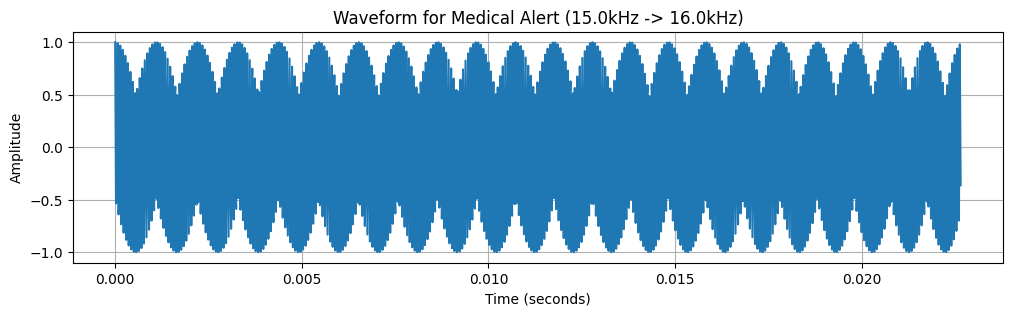

🔊 Listen to the 'Medical Alert' signal:



--- Generating: Public Harassment ---


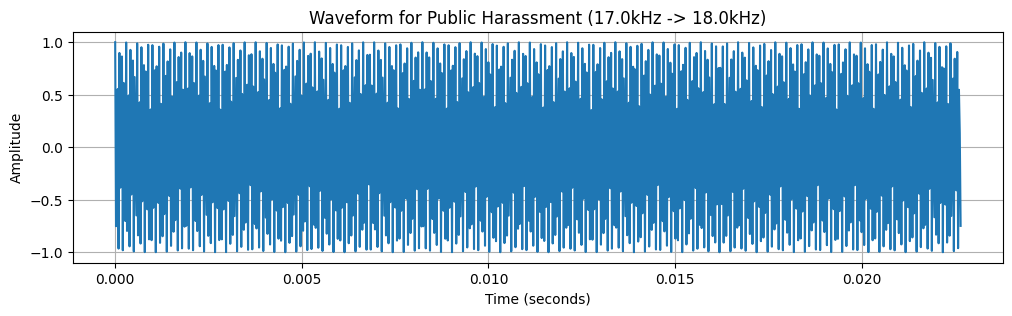

🔊 Listen to the 'Public Harassment' signal:



--- Generating: Fire / Smoke ---


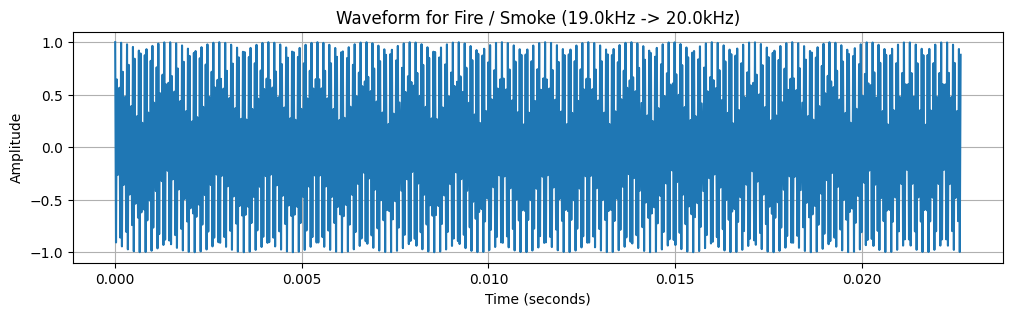

🔊 Listen to the 'Fire / Smoke' signal:


In [2]:
# ==============================================================
# Section 2: Generate, Plot, and Play Each Emergency Chirp
# ==============================================================

# Create the time array for our audio signal
t = np.linspace(0, DURATION, int(SAMPLE_RATE * DURATION), endpoint=False)

# Loop through each emergency defined in our configuration
for name, (start_freq, end_freq) in EMERGENCIES.items():
    print(f"\n--- Generating: {name} ---")

    # 1. Generate the chirp signal using scipy.signal.chirp
    # This creates a sound that sweeps from start_freq to end_freq
    chirp_signal = chirp(t, f0=start_freq, f1=end_freq, t1=DURATION, method='linear')

    # Store the generated signal for later use
    generated_chirps[name] = chirp_signal

    # 2. Visualize the waveform
    plt.figure(figsize=(12, 3))
    # We only plot the first 1000 samples to make the wave shape visible
    plt.plot(t[:1000], chirp_signal[:1000])
    plt.title(f"Waveform for {name} ({start_freq/1000}kHz -> {end_freq/1000}kHz)")
    plt.xlabel("Time (seconds)")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.show()

    # 3. Create an interactive audio player in the notebook
    print(f"🔊 Listen to the '{name}' signal:")
    ipd.display(ipd.Audio(chirp_signal, rate=SAMPLE_RATE))